In [2]:
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
T = 1000
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,)) # T * 1

In [12]:
[x][0]

tensor([ 1.3538e-01, -1.1913e-01, -5.8478e-04,  1.1683e-01, -1.7619e-01,
         2.0805e-01,  2.6661e-02,  3.0045e-01, -8.5296e-02, -6.5728e-03,
        -1.8003e-01,  1.5576e-01,  1.8604e-01, -1.8715e-02,  1.2235e-01,
         4.7624e-01,  4.9699e-01, -2.2204e-01,  3.0724e-01,  2.5546e-01,
         6.0025e-02, -2.2004e-01,  4.9888e-01,  3.4256e-02,  2.3557e-02,
         8.1922e-02,  3.5550e-01,  4.3891e-02,  4.0162e-01,  6.3026e-02,
         7.4787e-01, -1.5125e-03,  2.1287e-01,  3.2430e-01,  1.2796e-01,
         3.4277e-01,  4.8908e-01,  5.5868e-01,  2.8357e-01,  3.5967e-01,
        -1.2203e-02,  4.3576e-01,  3.9861e-01,  1.5117e-01,  2.3997e-01,
         6.4417e-01,  3.7678e-01,  6.5011e-01,  4.3034e-01,  7.3944e-01,
         1.3591e-01,  3.1663e-01,  4.2859e-01,  8.1067e-01,  3.4065e-01,
         5.6171e-01,  3.8291e-01,  4.6442e-01,  6.5531e-01,  2.7052e-01,
         4.8919e-01,  5.4894e-01,  4.6875e-01,  5.8028e-01,  9.2690e-01,
         7.2215e-01,  8.0505e-01,  6.3831e-01,  9.5

/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


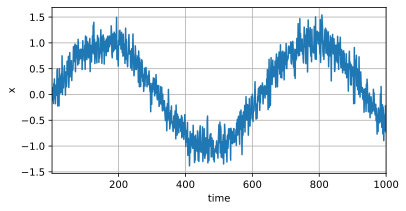

In [13]:
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6,3))

In [4]:
tau = 4
features = torch.zeros((T - tau, tau)) # (1000 - 4 * 4)

In [5]:
features.shape

torch.Size([996, 4])

In [6]:
for i in range(tau):
    features[:, i] = x[i:T-tau + i] # 存放x-1 x-2 ……x-t # 顺序cang
labels = x[tau:].reshape((-1, 1)) # -1是自动推导行数，T -tau + 1 * 1

In [7]:
batch_size, n_train = 16, 600
train_iter = d2l.load_array((features[:n_train], labels[:n_train]), batch_size, is_train=True) # 生成数据迭代器

In [18]:
d2l.load_array?

Signature: d2l.load_array(data_arrays, batch_size, is_train=True)
Docstring:
Construct a PyTorch data iterator.

Defined in :numref:`sec_linear_concise`
File:      ~/anaconda3/envs/torch/lib/python3.11/site-packages/d2l/torch.py
Type:      function

In [13]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

In [8]:
def get_net():
    net = nn.Sequential(nn.Linear(4, 10), 
                        nn.ReLU(),
                        nn.Linear(10, 1))
    net.apply(init_weights)
    return net;

In [9]:
loss = nn.MSELoss(reduction='none')

In [10]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad() # 每一次训练都有梯度清理
            l = loss(net(X), y)
            l.sum().backward()
            trainer.step()
        print(f'epoch {epoch + 1}, '
              f'loss"{d2l.evaluate_loss(net, train_iter, loss):f}')
        

In [14]:
net = get_net()

In [15]:
train(net, train_iter, loss, 5, 0.01) # features数据

epoch 1, loss"0.055027
epoch 2, loss"0.053495
epoch 3, loss"0.052089
epoch 4, loss"0.053347
epoch 5, loss"0.051411


In [16]:
onestep_preds = net(features) # 全部数据
onestep_preds.shape

torch.Size([996, 1])

/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


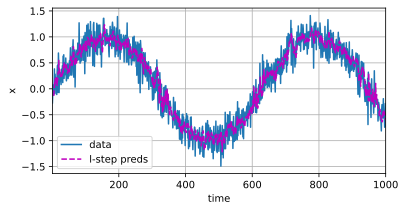

In [17]:
d2l.plot([time, time[tau:]],
          [x.detach().numpy(), onestep_preds.detach().numpy()], 'time',
          'x', legend=['data', 'l-step preds'], xlim=[1, 1000],
          figsize=(6, 3))

In [18]:
max_steps = 64

In [19]:
features = torch.zeros((T - tau - max_steps + 1, tau + max_steps)) # T * 64

In [20]:
for i in range(tau):
    features[:, i] = x[i: i + T - tau - max_steps + 1] # 初始化

In [21]:
features.shape

torch.Size([933, 68])

In [22]:
multistep_steps = torch.zeros(T)
multistep_steps[: n_train + tau] = x[: n_train + tau] # 训练值
for i in range(n_train + tau, T): # 后面的每个数
    multistep_steps[i] = net(
        multistep_steps[i- tau: i].reshape((1, -1))) # tau * 1  ===> 1 一个一个预测，用生成的前面一个序列去预测后面的值 不需要从新训练吗？

/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


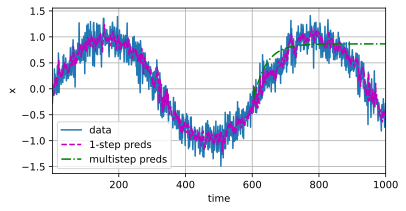

In [24]:
d2l.plot([time, time[tau:], time[n_train+tau:]],
         [x.detach().numpy(), onestep_preds.detach().numpy(),multistep_steps[n_train+tau:].detach().numpy()],
         'time','x', legend=['data','1-step preds','multistep preds'],xlim=[1,1000], figsize=(6,3))

In [26]:
class Myclass:
    def __init__(self):
        self.data = [1, 2, 3, 4]

    def __len__(self):
        return len(self.data)
        
    def __getitem__(self, index):
        if (index > self.__len__()):
            return -1;
        return self.data[index]
cla = Myclass()
cla[2]

3